<h1>Applied Data Science Capstone Project</h1>
<h3>By Anthony Yiu</h3>

<h2>The Coffee Shop Dilemma</h2>

Let's say that you are Mark, a 23 year-old college grad with a major in ***Coffeeology***.

Now that you've completed your education, your parents demand that you *finally* get a job and this time you don't have any excuses not to.

After consulting with some friends you graduated with who also studied ***Coffeeology***, three of them offer you to become the co-founder of their new coffee shops. 

The problem? Well, there's only one of you and they're all opening coffee shops in different cities!

One is opening in New York City, another in Los Angeles and the last one in Toronto!

Of course, you want to work for the coffee shop with the greatest potential.

Can you predict the how successful each coffee shop will be just based on their planned locations?

<h2>The Data</h2>

Luckily for you (Mark), you took a data science course to fulfill one of you GE requirements last year, so you know a thing for two about machine learning techniques and where to get data!



All location data and details will be pulled from the FourSquare Places API and since revenue from coffee shops (which are often private businesses) is not readily avaliable, general ratings will be used instead.

## Method

We will correlate factors from each city (e.g density of coffee shops) to the average ratings of coffee shops in each city in order to find out which city is the most viable for our coffee shop.

This correlation will be calculated using method such as regression.

# Procedure

First, let's pull a list of coffee venues from one of our cities!

Let's start with Toronto.

## Import Packages

In [54]:
import numpy as np
import pandas as pd
import folium
import requests
import seaborn as sns

from pandas.io.json import json_normalize
from random import randrange
from folium.plugins import MarkerCluster

## Set API Credentials

In [30]:
CLIENT_ID = 'CLIENT_ID' # your Foursquare ID
CLIENT_SECRET = 'CLIENT_SECRET' # your Foursquare Secret

VERSION = '20190425'

## Get and Preprocess Data

Below, I have created a convenience function for API calls to FourSquare exclusively for our purpose.

In [31]:
def getCoffeeData(CLIENT_ID, CLIENT_SECRET, VERSION, NEAR):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&near={}&intent=checkin&query=coffee'.format(CLIENT_ID, CLIENT_SECRET, VERSION, NEAR)
    req = requests.get(url).json()
    return req

In [32]:
coffee_data_toronto = getCoffeeData(CLIENT_ID, CLIENT_SECRET, VERSION, "Toronto, ON")
coffee_data_toronto

{'meta': {'code': 200, 'requestId': '605fdeeccce03f6f70408971'},
 'response': {'venues': [{'id': '4ea88fc7f5b9df9610511b8d',
    'name': 'Coffee Time Donuts',
    'location': {'address': '1471 Eglinton Avenue W.',
     'crossStreet': 'at Winona Dr.',
     'lat': 43.691852993172056,
     'lng': -79.43634389759859,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.691852993172056,
       'lng': -79.43634389759859}],
     'postalCode': 'M6E 2G6',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['1471 Eglinton Avenue W. (at Winona Dr.)',
      'Toronto ON M6E 2G6',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1616895724',
    'hasPerk': F

Let's first convert our data to a Pandas DataFrame.

In [33]:
coffee_data_toronto_df = pd.DataFrame(json_normalize(coffee_data_toronto['response']['venues']))
coffee_data_toronto_df.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood,venuePage.id
0,4ea88fc7f5b9df9610511b8d,Coffee Time Donuts,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1616895724,False,1471 Eglinton Avenue W.,at Winona Dr.,43.691853,-79.436344,"[{'label': 'display', 'lat': 43.69185299317205...",M6E 2G6,CA,Toronto,ON,Canada,"[1471 Eglinton Avenue W. (at Winona Dr.), Toro...",NaN,NaN
1,4ae33eb5f964a5203a9221e3,Timothy's World Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1616895724,False,700 mt pleasant ave,NaN,43.706027,-79.389369,"[{'label': 'display', 'lat': 43.70602710190901...",NaN,CA,Toronto,ON,Canada,"[700 mt pleasant ave, Toronto ON, Canada]",NaN,NaN
2,4ad79243f964a5204c0c21e3,Jetfuel Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1616895724,False,519 Parliament St.,btwn Carlton & Winchester,43.665295,-79.368335,"[{'label': 'display', 'lat': 43.66529519392083...",M4X 1P3,CA,Toronto,ON,Canada,[519 Parliament St. (btwn Carlton & Winchester...,Cabbagetown,NaN
3,4aeed74cf964a5205dd421e3,Timothy's World Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1616895724,False,1 Pleasant Blvd,at Yonge St.,43.687086,-79.393541,"[{'label': 'display', 'lat': 43.687086, 'lng':...",NaN,CA,Toronto,ON,Canada,"[1 Pleasant Blvd (at Yonge St.), Toronto ON, C...",NaN,NaN
4,4c5783a28fe2ef3b466b303a,Coffee Time,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1616895724,False,233 Eglinton Ave West,Oriole Parkway and Eglinton,43.703966,-79.405920,"[{'label': 'display', 'lat': 43.703966, 'lng':...",NaN,CA,Toronto,ON,Canada,[233 Eglinton Ave West (Oriole Parkway and Egl...,NaN,NaN


Then, we drop all the columns that we don't need.

In [34]:
coffee_data_toronto_df = coffee_data_toronto_df.drop(["id", "referralId", "hasPerk", "location.labeledLatLngs", "location.cc", "location.city", "location.country", "location.formattedAddress", "location.neighborhood", "venuePage.id", "location.postalCode", "location.state", "categories", "location.crossStreet"], axis = 1)
coffee_data_toronto_df.head()

,name,location.address,location.lat,location.lng
0,Coffee Time Donuts,1471 Eglinton Avenue W.,43.691853,-79.436344
1,Timothy's World Coffee,700 mt pleasant ave,43.706027,-79.389369
2,Jetfuel Coffee,519 Parliament St.,43.665295,-79.368335
3,Timothy's World Coffee,1 Pleasant Blvd,43.687086,-79.393541
4,Coffee Time,233 Eglinton Ave West,43.703966,-79.405920


Finally, we'll rename our columns to make it easier to read.

In [35]:
coffee_data_toronto_df[["Name", "Address", "Latitude", "Longitude"]] = coffee_data_toronto_df[["name", "location.address", "location.lat", "location.lng"]]
coffee_data_toronto_df = coffee_data_toronto_df.drop(["name", "location.address", "location.lat", "location.lng"], axis = 1)
coffee_data_toronto_df.head()

,Name,Address,Latitude,Longitude
0,Coffee Time Donuts,1471 Eglinton Avenue W.,43.691853,-79.436344
1,Timothy's World Coffee,700 mt pleasant ave,43.706027,-79.389369
2,Jetfuel Coffee,519 Parliament St.,43.665295,-79.368335
3,Timothy's World Coffee,1 Pleasant Blvd,43.687086,-79.393541
4,Coffee Time,233 Eglinton Ave West,43.703966,-79.405920


Obviously, we don't want to rewrite this code very single time we analyze a city, so I have written a function here:

In [36]:
def cleanCoffeeData(JSON_DATA):
    coffee_data_clean_df = pd.DataFrame(json_normalize(JSON_DATA['response']['venues']))
    coffee_data_clean_df = coffee_data_clean_df.drop(["referralId", "hasPerk", "location.labeledLatLngs", "location.cc", "location.city", "location.country", "location.formattedAddress", "location.neighborhood", "venuePage.id", "location.postalCode", "location.state", "categories", "location.crossStreet", "delivery.id", "delivery.url", "delivery.provider.name", "delivery.provider.icon.prefix", "delivery.provider.icon.sizes", "delivery.provider.icon.name"], axis = 1, errors = 'ignore')
    coffee_data_clean_df[["Name", "Address", "Latitude", "Longitude"]] = coffee_data_clean_df[["name", "location.address", "location.lat", "location.lng"]]
    coffee_data_clean_df = coffee_data_clean_df.drop(["name", "location.address", "location.lat", "location.lng"], axis = 1)
    return coffee_data_clean_df

Now, we can get our data by using two convenience functions just like this:

In [37]:
toronto_data = cleanCoffeeData(getCoffeeData(CLIENT_ID, CLIENT_SECRET, VERSION, "Toronto, ON"))
toronto_data.head()

,id,Name,Address,Latitude,Longitude
0,4ea88fc7f5b9df9610511b8d,Coffee Time Donuts,1471 Eglinton Avenue W.,43.691853,-79.436344
1,4ae33eb5f964a5203a9221e3,Timothy's World Coffee,700 mt pleasant ave,43.706027,-79.389369
2,4ad79243f964a5204c0c21e3,Jetfuel Coffee,519 Parliament St.,43.665295,-79.368335
3,4aeed74cf964a5205dd421e3,Timothy's World Coffee,1 Pleasant Blvd,43.687086,-79.393541
4,4c5783a28fe2ef3b466b303a,Coffee Time,233 Eglinton Ave West,43.703966,-79.405920


Isn't that neat?

Of course, we need data from Los Angeles and New York City as well.

In [38]:
nyc_data = cleanCoffeeData(getCoffeeData(CLIENT_ID, CLIENT_SECRET, VERSION, "New York City, NY"))
la_data = cleanCoffeeData(getCoffeeData(CLIENT_ID, CLIENT_SECRET, VERSION, "Los Angeles, CA"))

In [39]:
nyc_data.head()

,id,Name,Address,Latitude,Longitude
0,49c406a8f964a5208d561fe3,Brooklyn Bagel & Coffee Co.,286 8th Ave,40.746119,-73.997700
1,55e9f118498eda28f897f9e3,Kobrick Coffee Co.,24 9th Ave,40.740337,-74.005693
2,3fd66200f964a52008e91ee3,Irving Farm Coffee Roasters,71 Irving Pl,40.736716,-73.986817
3,546cb126498eabb0f206d61f,Partners Coffee Roasters,44 Charles St,40.734913,-74.002051
4,5cc82d711acf11002c0998f5,St Kilda Coffee,213 8th Ave,40.743854,-73.999770


In [40]:
la_data.head()

,id,Name,Address,Latitude,Longitude
0,4dc17e7cfa764d03e9ffb874,DRNK coffee + tea,201 N Los Angeles St,34.054399,-118.240791
1,4ad7ae48f964a5209d0d21e3,Spring For Coffee,548 S Spring St #106,34.046210,-118.250748
2,5ba413086bdee6002cca9d99,SPLA Coffee Company,714 N Figueroa St,34.063803,-118.245299
3,54c7d710498ed093faf6a57e,Verve Coffee,833 S Spring St,34.042203,-118.254521
4,53c621cb498ecf3134b82684,Blue Bottle Coffee,"582 Mateo St, Los Angeles, CA 90013 kafka test",34.039101,-118.232592


We have some data here, but we're still missing something: Ratings!

Let's see how we can get venue ratings:

In [41]:
def getVenueRating(VENUE_ID):
    url = "https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}".format(VENUE_ID, CLIENT_ID, CLIENT_SECRET, VERSION)
    req = requests.get(url).json()
    return req


The convenience function above returns a rating for the venue whos ID is provided. Using this function, we can figure out the ratings for each venue and add a column of values to our original dataframes! Any unrated venues will be given a score of "NaN" then we'll drop them from the dataset before analysis.

In [42]:
print(getVenueRating("4dc17e7cfa764d03e9ffb874"))

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '605fdeee9d5ef71584e4d089'}, 'response': {}}


In [43]:
toronto_data["Rating"] = toronto_data["id"].apply(getVenueRating)
toronto_data.head()

,id,Name,Address,Latitude,Longitude,Rating
0,4ea88fc7f5b9df9610511b8d,Coffee Time Donuts,1471 Eglinton Avenue W.,43.691853,-79.436344,"{'meta': {'code': 429, 'errorType': 'quota_exc..."
1,4ae33eb5f964a5203a9221e3,Timothy's World Coffee,700 mt pleasant ave,43.706027,-79.389369,"{'meta': {'code': 429, 'errorType': 'quota_exc..."
2,4ad79243f964a5204c0c21e3,Jetfuel Coffee,519 Parliament St.,43.665295,-79.368335,"{'meta': {'code': 429, 'errorType': 'quota_exc..."
3,4aeed74cf964a5205dd421e3,Timothy's World Coffee,1 Pleasant Blvd,43.687086,-79.393541,"{'meta': {'code': 429, 'errorType': 'quota_exc..."
4,4c5783a28fe2ef3b466b303a,Coffee Time,233 Eglinton Ave West,43.703966,-79.405920,"{'meta': {'code': 429, 'errorType': 'quota_exc..."


In [44]:
nyc_data["Rating"] = nyc_data["id"].apply(getVenueRating)
nyc_data.head()

,id,Name,Address,Latitude,Longitude,Rating
0,49c406a8f964a5208d561fe3,Brooklyn Bagel & Coffee Co.,286 8th Ave,40.746119,-73.997700,"{'meta': {'code': 429, 'errorType': 'quota_exc..."
1,55e9f118498eda28f897f9e3,Kobrick Coffee Co.,24 9th Ave,40.740337,-74.005693,"{'meta': {'code': 429, 'errorType': 'quota_exc..."
2,3fd66200f964a52008e91ee3,Irving Farm Coffee Roasters,71 Irving Pl,40.736716,-73.986817,"{'meta': {'code': 429, 'errorType': 'quota_exc..."
3,546cb126498eabb0f206d61f,Partners Coffee Roasters,44 Charles St,40.734913,-74.002051,"{'meta': {'code': 429, 'errorType': 'quota_exc..."
4,5cc82d711acf11002c0998f5,St Kilda Coffee,213 8th Ave,40.743854,-73.999770,"{'meta': {'code': 429, 'errorType': 'quota_exc..."


In [45]:
la_data["Rating"] = la_data["id"].apply(getVenueRating)
la_data.head()

,id,Name,Address,Latitude,Longitude,Rating
0,4dc17e7cfa764d03e9ffb874,DRNK coffee + tea,201 N Los Angeles St,34.054399,-118.240791,"{'meta': {'code': 429, 'errorType': 'quota_exc..."
1,4ad7ae48f964a5209d0d21e3,Spring For Coffee,548 S Spring St #106,34.046210,-118.250748,"{'meta': {'code': 429, 'errorType': 'quota_exc..."
2,5ba413086bdee6002cca9d99,SPLA Coffee Company,714 N Figueroa St,34.063803,-118.245299,"{'meta': {'code': 429, 'errorType': 'quota_exc..."
3,54c7d710498ed093faf6a57e,Verve Coffee,833 S Spring St,34.042203,-118.254521,"{'meta': {'code': 429, 'errorType': 'quota_exc..."
4,53c621cb498ecf3134b82684,Blue Bottle Coffee,"582 Mateo St, Los Angeles, CA 90013 kafka test",34.039101,-118.232592,"{'meta': {'code': 429, 'errorType': 'quota_exc..."


Now, normally I would make a correlation here between ratings and cities. However, the 500 premium calls/day cap does not allow me to do so (at least not within the next week), so we will have to generate our own mock ratings.

Here's the function we will be using for our mock ratings:

In [46]:
def generateRating(ID):
    return randrange(11)

Now, let's apply this function to all of our datasets and drop the original "Rating" columns (which we can't use due to quota limitations).

In [47]:
toronto_data["MockRating"] = toronto_data["id"].apply(generateRating)
toronto_data = toronto_data.drop(["Rating"], axis = 1)
toronto_data.head()

,id,Name,Address,Latitude,Longitude,MockRating
0,4ea88fc7f5b9df9610511b8d,Coffee Time Donuts,1471 Eglinton Avenue W.,43.691853,-79.436344,1
1,4ae33eb5f964a5203a9221e3,Timothy's World Coffee,700 mt pleasant ave,43.706027,-79.389369,2
2,4ad79243f964a5204c0c21e3,Jetfuel Coffee,519 Parliament St.,43.665295,-79.368335,7
3,4aeed74cf964a5205dd421e3,Timothy's World Coffee,1 Pleasant Blvd,43.687086,-79.393541,8
4,4c5783a28fe2ef3b466b303a,Coffee Time,233 Eglinton Ave West,43.703966,-79.405920,9


In [48]:
nyc_data["MockRating"] = nyc_data["id"].apply(generateRating)
nyc_data = nyc_data.drop(["Rating"], axis = 1)
nyc_data.head()

,id,Name,Address,Latitude,Longitude,MockRating
0,49c406a8f964a5208d561fe3,Brooklyn Bagel & Coffee Co.,286 8th Ave,40.746119,-73.997700,4
1,55e9f118498eda28f897f9e3,Kobrick Coffee Co.,24 9th Ave,40.740337,-74.005693,10
2,3fd66200f964a52008e91ee3,Irving Farm Coffee Roasters,71 Irving Pl,40.736716,-73.986817,4
3,546cb126498eabb0f206d61f,Partners Coffee Roasters,44 Charles St,40.734913,-74.002051,8
4,5cc82d711acf11002c0998f5,St Kilda Coffee,213 8th Ave,40.743854,-73.999770,3


In [49]:
la_data["MockRating"] = la_data["id"].apply(generateRating)
la_data = la_data.drop(["Rating"], axis = 1)
la_data.head()

,id,Name,Address,Latitude,Longitude,MockRating
0,4dc17e7cfa764d03e9ffb874,DRNK coffee + tea,201 N Los Angeles St,34.054399,-118.240791,8
1,4ad7ae48f964a5209d0d21e3,Spring For Coffee,548 S Spring St #106,34.046210,-118.250748,10
2,5ba413086bdee6002cca9d99,SPLA Coffee Company,714 N Figueroa St,34.063803,-118.245299,7
3,54c7d710498ed093faf6a57e,Verve Coffee,833 S Spring St,34.042203,-118.254521,2
4,53c621cb498ecf3134b82684,Blue Bottle Coffee,"582 Mateo St, Los Angeles, CA 90013 kafka test",34.039101,-118.232592,7


Now that we have our "data," let's begin our analysis.

Our first task is to figure out how each city compares in terms of rating, so let's visualize our data in a Seaborn histogram for each city.

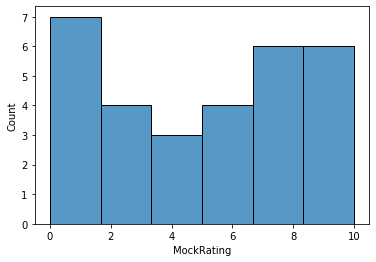

In [50]:
sns.histplot(x=toronto_data["MockRating"])

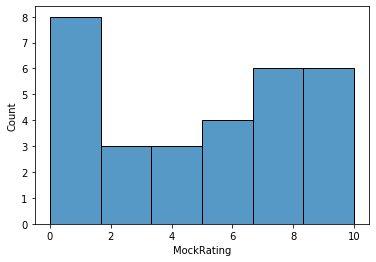

In [51]:
sns.histplot(x=nyc_data["MockRating"])

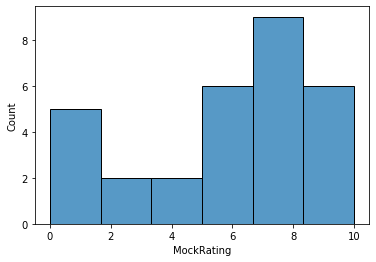

In [52]:
sns.histplot(x=la_data["MockRating"])

As you can see from our (mock) data, it appears that Los Angeles is clearly the leader in coffee shop ratings, followed closely by Los Angeles and Toronto lagging far behind. However, average rating is not (and should not be) the only metric we use to determine if it's the best city for our shop.

Another factor we need to take into consideration is the density of shops. After all - even if we had the best coffee in the world, having 50 other shops just like us wouldn't do us much help.

We can visualize this density without using any distance algorithms simply by mapping out the venues visually using Folium.

In [58]:
toronto_coffee_map = folium.Map(location = [toronto_data["Latitude"][0], toronto_data["Longitude"][0]])
toronto_cluster = MarkerCluster().add_to(toronto_coffee_map)

for i in range(len(toronto_data)):
    folium.Marker(
        location = [toronto_data.loc[i, "Latitude"], toronto_data.loc[i, "Longitude"]],
        popup = toronto_data.loc[i, "Name"]
    ).add_to(toronto_cluster)
    
toronto_coffee_map

In [59]:
nyc_coffee_map = folium.Map(location = [nyc_data["Latitude"][0], nyc_data["Longitude"][0]])
nyc_cluster = MarkerCluster().add_to(nyc_coffee_map)

for i in range(len(nyc_data)):
    folium.Marker(
        location = [nyc_data.loc[i, "Latitude"], nyc_data.loc[i, "Longitude"]],
        popup = nyc_data.loc[i, "Name"]
    ).add_to(nyc_cluster)
    
nyc_coffee_map

In [60]:
la_coffee_map = folium.Map(location = [la_data["Latitude"][0], la_data["Longitude"][0]])
la_cluster = MarkerCluster().add_to(la_coffee_map)

for i in range(len(la_data)):
    folium.Marker(
        location = [la_data.loc[i, "Latitude"], la_data.loc[i, "Longitude"]],
        popup = la_data.loc[i, "Name"]
    ).add_to(la_cluster)
    
la_coffee_map

# Conclusion

## Results

Just by visually checking the maps, it's clear that Los Angeles is densely populated whereas New York City and Toronto still have some room for growth.

So what is the best city to go to, you wonder.

Well, if you can afford the rent - New York City!

If you can't, then you can try Toronto, but bear in mind that the businesses there suffer lower ratings.

And LA? It might have the best ratings, but it's so densely populated with coffee shops that the competition will be extremely stiff - maybe if you're a risk taker.

## Discussion

An obvious limitation of this study was the inability to get proper ratings from the FourSquare API due to it's paid plans. Furthermore, this restricted prevented the use of greater analytical methods (linear regression, etc) due to lack of accessible data beyond geospatial positions.